<a href="https://colab.research.google.com/github/lanreayk/Data-Analytics_ML_portfolio/blob/main/EEG_emotion_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#EEG data classification into 3 states: Neutral, Positive and Negative emotion during a video stimulus and several ML algorithms were tested
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report




 Data importing

In [ ]:
path=r"C:\Users\yusuf\Desktop\document\resources\main document folder\New EEG and LLM folder\emotion EEG data\emotions.csv"
data = pd.read_csv(path)
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:
#dimension of data
data.shape

(2132, 2549)

In [ ]:
#get statistical description of the data
data.describe()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
count,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,...,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000
mean,15.256914,27.012462,-104.975629,13.605898,24.150483,0.025378,0.052282,0.301655,0.036793,0.083567,...,-22.938971,104.946111,-51.973647,-51.973647,104.946111,-6.934144,95.104886,-49.061255,-49.061255,95.104886
std,15.284621,9.265141,206.271960,16.874676,14.187340,17.981796,8.509174,68.098894,17.010031,18.935378,...,298.034311,212.532721,112.160233,112.160233,212.532721,281.040552,203.194976,106.486317,106.486317,203.194976
min,-61.300000,-114.000000,-970.000000,-137.000000,-217.000000,-218.000000,-255.000000,-1360.000000,-203.000000,-553.000000,...,-1180.000000,-921.000000,-504.000000,-504.000000,-921.000000,-1160.000000,-1010.000000,-521.000000,-521.000000,-1010.000000
25%,6.577500,26.075000,-195.000000,4.857500,23.600000,-3.105000,-1.340000,-4.002500,-2.905000,-2.622500,...,-106.500000,-8.365000,-92.900000,-92.900000,-8.365000,-102.500000,-8.837500,-87.150000,-87.150000,-8.837500
50%,14.100000,30.000000,14.950000,15.400000,25.200000,-0.044600,0.132000,0.957500,-0.099750,0.146500,...,83.850000,12.150000,-21.800000,-21.800000,12.150000,89.700000,13.400000,-24.100000,-24.100000,13.400000
75%,27.700000,31.400000,29.600000,26.500000,26.800000,2.920000,1.540000,6.735000,2.535000,2.870000,...,154.000000,177.000000,12.025000,12.025000,177.000000,153.000000,149.250000,10.925000,10.925000,149.250000
max,304.000000,42.300000,661.000000,206.000000,213.000000,402.000000,257.000000,1150.000000,349.000000,444.000000,...,1070.000000,843.000000,1490.000000,1490.000000,843.000000,1180.000000,888.000000,1670.000000,1670.000000,888.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


C:\Users\yusuf\AppData\Local\Temp\ipykernel_12812\2356113430.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # You can choose any seaborn style


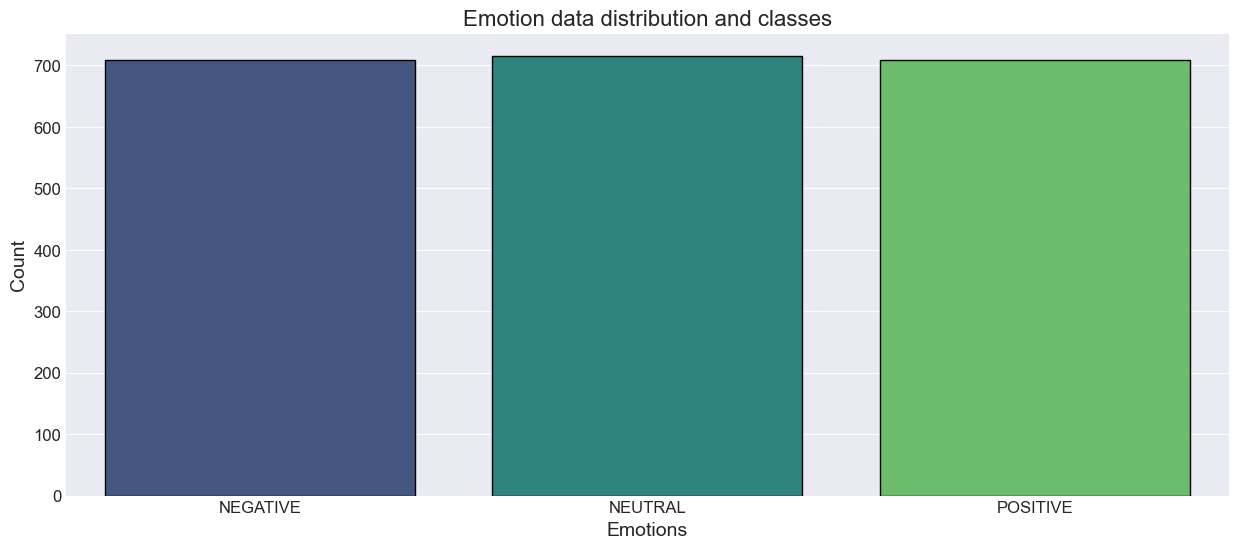

In [ ]:
# the last column is the label
# plot the label column to identify the classes
plt.figure(figsize=(15, 6))
plt.title("Emotion data distribution and classes", fontsize=16)
plt.style.use('seaborn-darkgrid')  # You can choose any seaborn style

# Make the bar slimmer and add more styling
sns.countplot(x='label', data=data, palette='viridis', edgecolor='black', linewidth=1)

plt.xlabel("Emotions", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
#Verify the emotion classes and check for mislaebl
data['label'].unique()

array(['NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype=object)

In [ ]:
#split the data into X and y where y is the label and X are the features
y_output=data['label']
X_features=data.drop(['label'], axis=1)

In [ ]:
y_output

0       NEGATIVE
1        NEUTRAL
2       POSITIVE
3       POSITIVE
4        NEUTRAL
          ...   
2127     NEUTRAL
2128    POSITIVE
2129    NEGATIVE
2130    NEGATIVE
2131     NEUTRAL
Name: label, Length: 2132, dtype: object

In [ ]:
# encode y into numeric data
from sklearn.preprocessing import LabelEncoder
Lenc=LabelEncoder()
y=pd.DataFrame(Lenc.fit_transform(y_output))
y=y.values
y

array([[0],
       [1],
       [2],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
X_features

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


In [ ]:
#remove the column names, turn it to an array
X=X_features.values

In [ ]:
X


array([[ 4.62e+00,  3.03e+01, -3.56e+02, ..., -1.62e+02, -1.62e+02,
         2.80e+02],
       [ 2.88e+01,  3.31e+01,  3.20e+01, ..., -3.16e+01, -3.16e+01,
         2.57e+00],
       [ 8.90e+00,  2.94e+01, -4.16e+02, ..., -1.48e+02, -1.48e+02,
         2.81e+02],
       ...,
       [-5.47e-01,  2.83e+01, -2.59e+02, ..., -1.05e+01, -1.05e+01,
        -1.69e+02],
       [ 1.68e+01,  1.99e+01, -2.88e+02, ..., -2.71e+02, -2.71e+02,
         5.52e+02],
       [ 2.70e+01,  3.20e+01,  3.18e+01, ...,  2.28e+01,  2.28e+01,
        -6.71e+00]])

Uisng pipline and Machine learning Modelling

In [ ]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vecto

Accuracy: 0.7681498829039812
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       142
           1       1.00      0.83      0.91       143
           2       0.99      0.47      0.64       142

    accuracy                           0.77       427
   macro avg       0.86      0.77      0.76       427
weighted avg       0.86      0.77      0.76       427

Tuned Model Parameters: {'SVM__C': 10, 'SVM__gamma': 0.01}


[[142   0   0]
 [ 23 119   1]
 [ 75   0  67]]


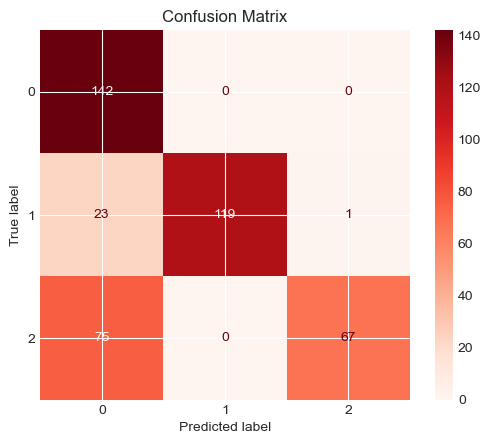

In [ ]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix')

plt.show()


This shows that the best paramter for optimal accuracy is SVM_C:10 and SVM_gamma: 0.01 and the accuracy is 76.8%

In [ ]:
# try tuned random forest
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Create a StandardScaler
scaler = StandardScaler()

# Create a pipeline with the classifier and scaler
pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', rf_classifier)
])

# Define the hyperparameters and their possible values
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__bootstrap': [True, False]
}

# Perform Grid Search Cross Validation with the pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator to make predictions
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\pipeline.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\pipeline.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
c:\Users\yusuf\an

Best Parameters: {'classifier__bootstrap': False, 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      1.00      1.00       143
           2       1.00      0.99      1.00       142

    accuracy                           1.00       427
   macro avg       1.00      1.00      1.00       427
weighted avg       1.00      1.00      1.00       427



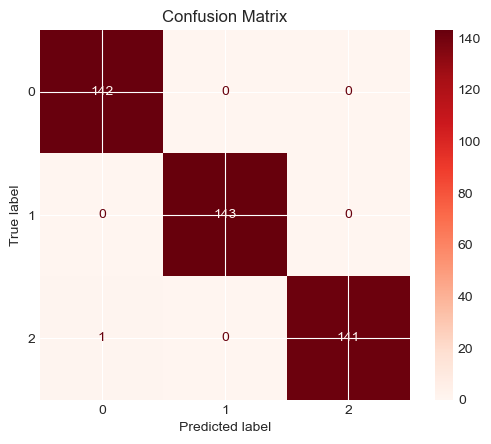

In [ ]:
# Generate the confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))
#from sklearn.metrics import ConfusionMatrixDisplay
y_pred = best_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix')

plt.show()

In [ ]:
#Using the Knearest neighbor algorithm
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       142
           1       0.99      1.00      1.00       143
           2       0.98      0.85      0.91       142

    accuracy                           0.95       427
   macro avg       0.95      0.95      0.95       427
weighted avg       0.95      0.95      0.95       427



c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


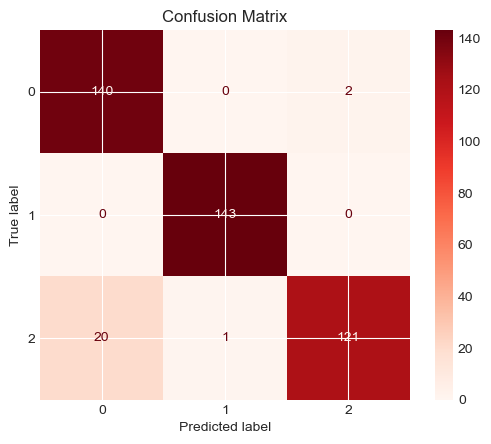

In [ ]:
# Generate the confusion matrix and classification report
#print(confusion_matrix(y_test, y_pred))
#from sklearn.metrics import ConfusionMatrixDisplay
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix')

plt.show()

In [ ]:
#Using MLP Model
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
         ('mlp', MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(128, 128), random_state=1))]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1091: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97       142
           1       0.99      0.97      0.98       143
           2       0.96      0.94      0.95       142

    accuracy                           0.96       427
   macro avg       0.97      0.96      0.96       427
weighted avg       0.97      0.96      0.96       427



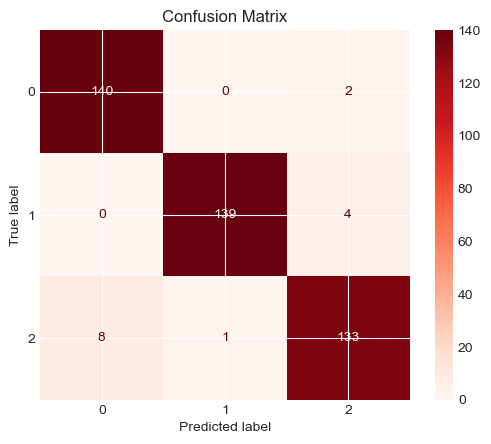

In [ ]:
# Generate the confusion matrix
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix')

plt.show()

In [ ]:
!pip install tensorflow

  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl (2.1 kB)


     ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/300.9 MB 3.4 MB/s eta 0:01:29
     ---------------------------------------- 0.1/300.9 MB 1.7 MB/s eta 0:03:03
     ---------------------------------------- 0.2/300.9 MB 1.3 MB/s eta 0:03:49
     ---------------------------------------- 0.2/300.9 MB 1.2 MB/s eta 0:04:02
     ---------------------------------------- 0.3/300.9 MB 1.3 MB/s eta 0:03:49
     ---------------------------------------- 0.3/300.9 MB 1.3 MB/s eta 0:03:58
     ---------------------------------------- 0.4/300.9 MB 1.3 MB/s eta 0:03:49
     ---------------------------------------- 0.4/300.9 MB 1.3 MB/s eta 0:03:50
     ---------------------------------------- 0.5/300.9 MB 1.3 MB/s eta 0:03:55
     ---------------------------------------- 0.5/300.9 MB 1.3 MB/s eta 0:03:55
     ---------------------------------------- 0.5/300.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Define the model for multiclass classification
num_classes = len(np.unique(y))  # Number of unique classes in your target variable
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Setup the pipeline steps
steps = [('scaler', StandardScaler()),
         ('model', model)]

# Create the pipeline
pipeline = Pipeline(steps)

# Train the pipeline
pipeline.fit(X_train, y_train, model__epochs=10, model__batch_size=32, model__validation_data=(X_test, y_test))

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test, y_pred_classes))

Epoch 1/10
54/54 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.8938 - val_loss: 0.1763 - val_accuracy: 0.9461
Epoch 2/10
54/54 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.9625 - val_loss: 0.1279 - val_accuracy: 0.9508
Epoch 3/10
54/54 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9877 - val_loss: 0.1116 - val_accuracy: 0.9649
Epoch 4/10
54/54 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9912 - val_loss: 0.0908 - val_accuracy: 0.9696
Epoch 5/10
54/54 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9982 - val_loss: 0.0802 - val_accuracy: 0.9719
Epoch 6/10
54/54 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9994 - val_loss: 0.0870 - val_accuracy: 0.9696
Epoch 7/10
54/54 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0786 - val_accuracy: 0.9719
Epoch 8/10
54/54 [==

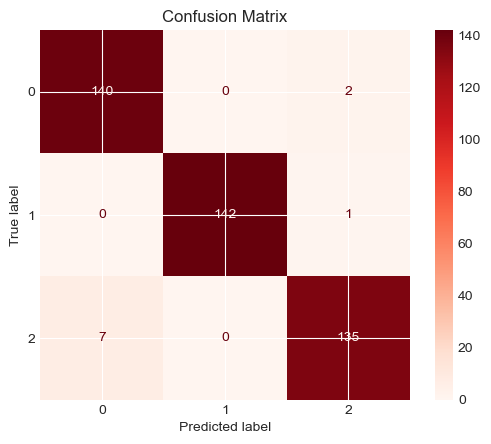

In [ ]:
# Generate the confusion matrix
#y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Reds)
disp.ax_.set_title('Confusion Matrix')

plt.show()